## import important packages

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import datetime

## Get sample dataset from Zenodo

In [5]:
!wget https://zenodo.org/record/3475894/files/Abisko-prep.tar.gz

--2019-10-08 14:56:52--  https://zenodo.org/record/3475894/files/Abisko-prep.tar.gz
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 833281373 (795M) [application/octet-stream]
Saving to: ‘Abisko-prep.tar.gz’

Abisko-prep.tar.gz  100%[===================>] 794.68M  13.3MB/s    in 58s     

2019-10-08 14:57:51 (13.7 MB/s) - ‘Abisko-prep.tar.gz’ saved [833281373/833281373]



In [8]:
!tar zxvf Abisko-prep.tar.gz

Abisko-prep/
Abisko-prep/T_recon_NTREND_NH1_EURO.csv
Abisko-prep/ensmean_temp2_pre_seas_trees_fldmean_a_yrmean.nc
Abisko-prep/Theta_OPT-0015.nc
Abisko-prep/piControl_BOT_1850-2849_temp2_fldmean.nc
Abisko-prep/ue536a02_temp2_pre_seas_trees_fldmean_a_yrmean.nc
Abisko-prep/ue536a04_temp2_pre_seas_trees_fldmean_a_yrmean.nc
Abisko-prep/ensmean_1536_1550_geopoth_seas_a.nc
Abisko-prep/ensmean_PE_seas.nc
Abisko-prep/ue536a01_temp2_pre_seas_trees_fldmean_a_yrmean.nc
Abisko-prep/ue536a06_temp2_pre_seas_trees_fldmean_a_yrmean.nc
Abisko-prep/ue536a05_temp2_pre_seas_trees_fldmean_a_yrmean.nc
Abisko-prep/ue536a03_temp2_pre.nc
Abisko-prep/ue536a03_temp2_pre_seas_trees_fldmean_a_yrmean.nc


## Load a csv file (comma separated values)
- Pandas python package can be used analyze csv 
- index_col parameter allows to tell which column in the input file should be 
  used for indexing the dataset

In [2]:
#observations
Stoffel = pd.read_csv('Abisko-prep/T_recon_NTREND_NH1_EURO.csv', index_col='Year')

In [3]:
#check data
Stoffel

,EURO_Mean,Lower2sigma,Upper2sigma,Luterbacher 2016,MXD/RW/multiproxy,Year.1,NTREND2015,upper2sigma,lower2sigma,Wilson 2016,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,SSW (Mean=3)
Year,,,,,,,,,,,,,,,,,,,,,
2014,NaN,NaN,NaN,Env.Res.Lett,NaN,2014.0,NaN,NaN,NaN,QSR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,2011.0,1.259,3.045,-0.527,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,2010.0,0.911,2.223,-0.402,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-134,-0.503,-1.325,0.271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-135,-0.436,-1.278,0.353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-136,-0.067,-0.916,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#check shape
Stoffel.shape

(2152, 33)

## Plot NH1 column

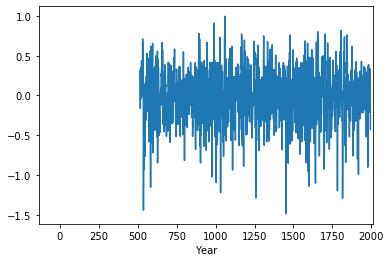

In [5]:
Stoffel['NH1'].plot()

# Plot data from year 1464 to year 1500

Text(0, 0.5, 'y label')

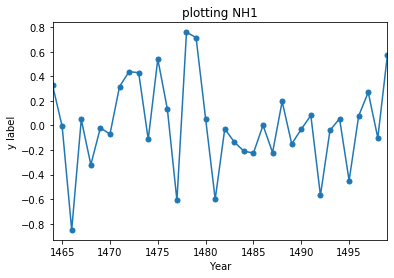

In [6]:
starty=1464; endy=1500
ax = Stoffel['NH1'].loc[range(starty,endy)].plot(title = 'plotting NH1', marker='.', markersize=10)
ax.set_ylabel("y label")

# Select several columns to plot

Text(0, 0.5, 'y label')

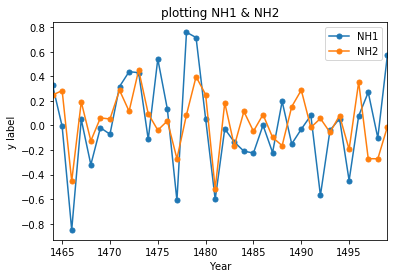

In [7]:
starty=1464; endy=1500
ax = Stoffel[['NH1','NH2']].loc[range(starty,endy)].plot(title = 'plotting NH1 & NH2', marker='.', markersize=10)
ax.set_ylabel("y label")

# Analyze netCDF file (Network Common Data Form)
- Self-describing (metadata is contained in the data)
- Machine independent
See https://en.wikipedia.org/wiki/NetCDF

In [8]:
#open control run
cntrl = xr.open_dataset('Abisko-prep/piControl_BOT_1850-2849_temp2_fldmean.nc', decode_times  = True, use_cftime = True)

In [10]:
# set reference time so it makes it easier to use with xarray
!cdo setreftime,1850-01-31,00:00:00 Abisko-prep/piControl_BOT_1850-2849_temp2_fldmean.nc Abisko-prep/po.nc

cdo    setreftime: Changing absolute to relative time axis!
cdo    setreftime: Processed 1 variable over 10200 timesteps [0.08s 28MB].


In [11]:
cntrl = xr.open_dataset('Abisko-prep/po.nc', decode_times  = True, use_cftime = True)

In [12]:
cntrl.time.values

array([cftime.DatetimeProlepticGregorian(1850, 1, 31, 18, 0, 0, 0, 3, 31),
       cftime.DatetimeProlepticGregorian(1850, 2, 28, 18, 0, 0, 0, 3, 59),
       cftime.DatetimeProlepticGregorian(1850, 3, 31, 18, 0, 0, 0, 6, 90),
       ...,
       cftime.DatetimeProlepticGregorian(2699, 10, 31, 18, 0, 0, 0, 1, 304),
       cftime.DatetimeProlepticGregorian(2699, 11, 30, 18, 0, 0, 0, 3, 334),
       cftime.DatetimeProlepticGregorian(2699, 12, 31, 18, 0, 0, 0, 6, 365)],
      dtype=object)

In [13]:
cntrl.var167
# Same as specifying cntrl['var167']

<xarray.DataArray 'var167' (time: 10200, lat: 1, lon: 1)>
array([[[284.6464 ]],

       [[284.82816]],

       ...,

       [[285.46655]],

       [[284.6732 ]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-31 18:00:00 ... 2699-12-31 18:00:00
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Attributes:
    code:     167
    table:    128

In [14]:
#Go from Kelvin to Celsius
cntrl['var167'] = cntrl['var167']-273.15

In [15]:
cntrl

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 10200)
Coordinates:
  * time     (time) object 1850-01-31 18:00:00 ... 2699-12-31 18:00:00
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Data variables:
    var167   (time, lat, lon) float32 11.496399 11.678162 ... 11.523193
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Tue Oct 08 20:02:11 2019: cdo setreftime,1850-01-31,00:00:0...
    institution:  Max Planck Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

In [18]:
cntrl['var167'].plot()

In [19]:
std_cntrl = cntrl['var167'].groupby('time.month').std().mean()
#For a 2 sigma std
sig2 = std_cntrl*2
sig2

<xarray.DataArray 'var167' ()>
array(0.29659799)

In [20]:
ds_ens = xr.open_dataset('Abisko-prep/ensmean_PE_seas.nc')
ds_ens

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 192, time: 105)
Coordinates:
  * time       (time) float64 2.189e+07 2.189e+07 ... 1.55e+07 1.55e+07
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float64 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    aprc       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Wed Jul 17 17:39:15 2019: cdo ensmean ue536a03_PE_seas.nc u...
    source:       ECHAM6
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

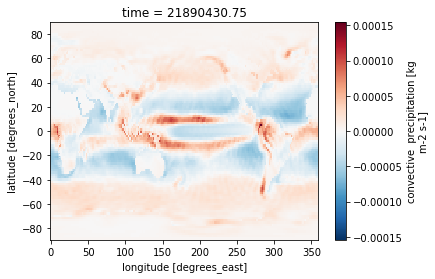

In [23]:
ds_ens['aprc'].isel(time=1).plot()

(0, 90)

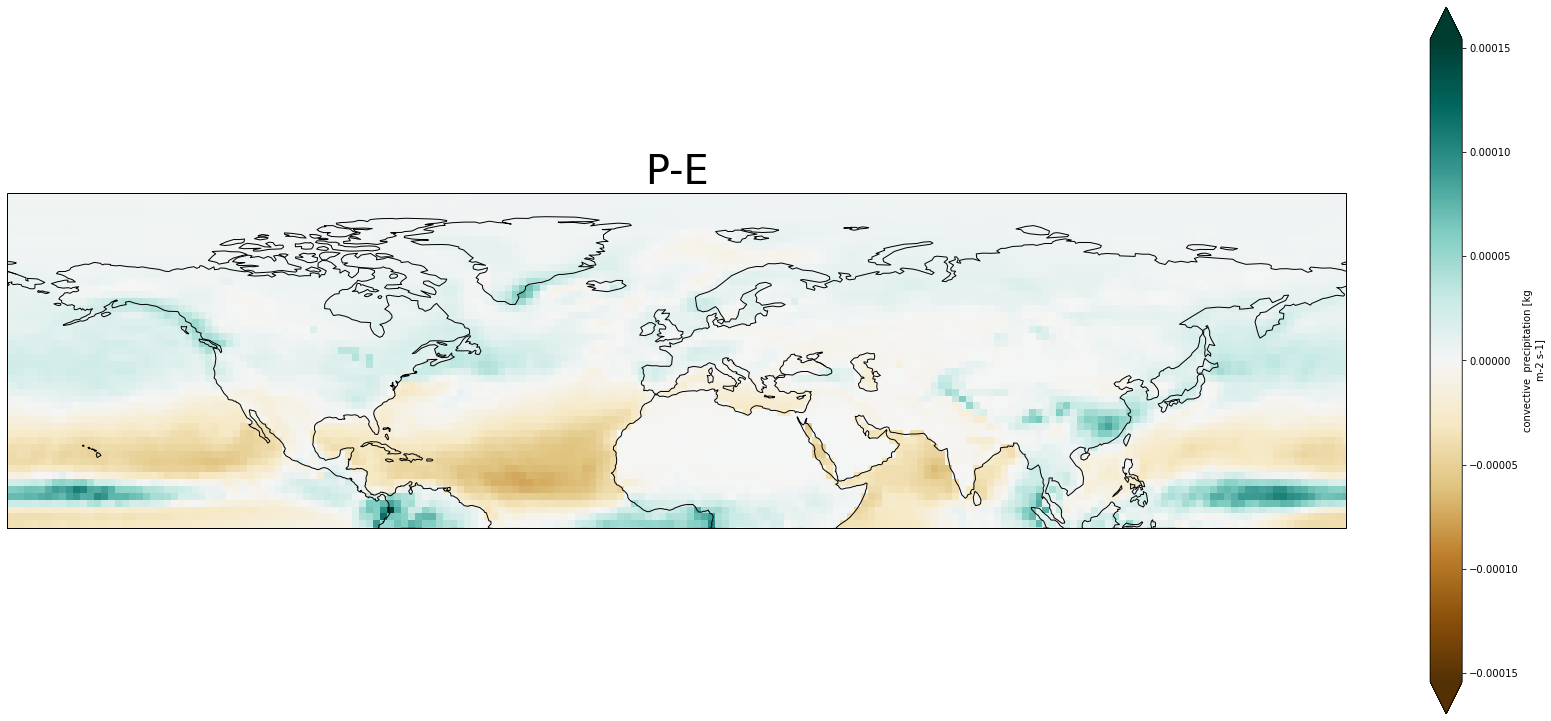

In [44]:
#plot maps
#For maps you take the ensemble mean
fig = plt.figure(1,figsize = [30,13])

#range
vc=np.arange(-2,3,.5)

# We're using cartopy and are plotting in PlateCarree projection 
# (see documentation on cartopy)
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines()

ds_ens['aprc'].isel(time=1).plot.pcolormesh(ax = ax1, extend='both', cmap=plt.get_cmap('BrBG'))
#Title
plt.title('P-E', fontsize=40)
#If you want you can zoom in to a specific area
ax1.set_xlim([-180,180])
ax1.set_ylim([0,90])

Text(0, 0.5, 'mm/day')

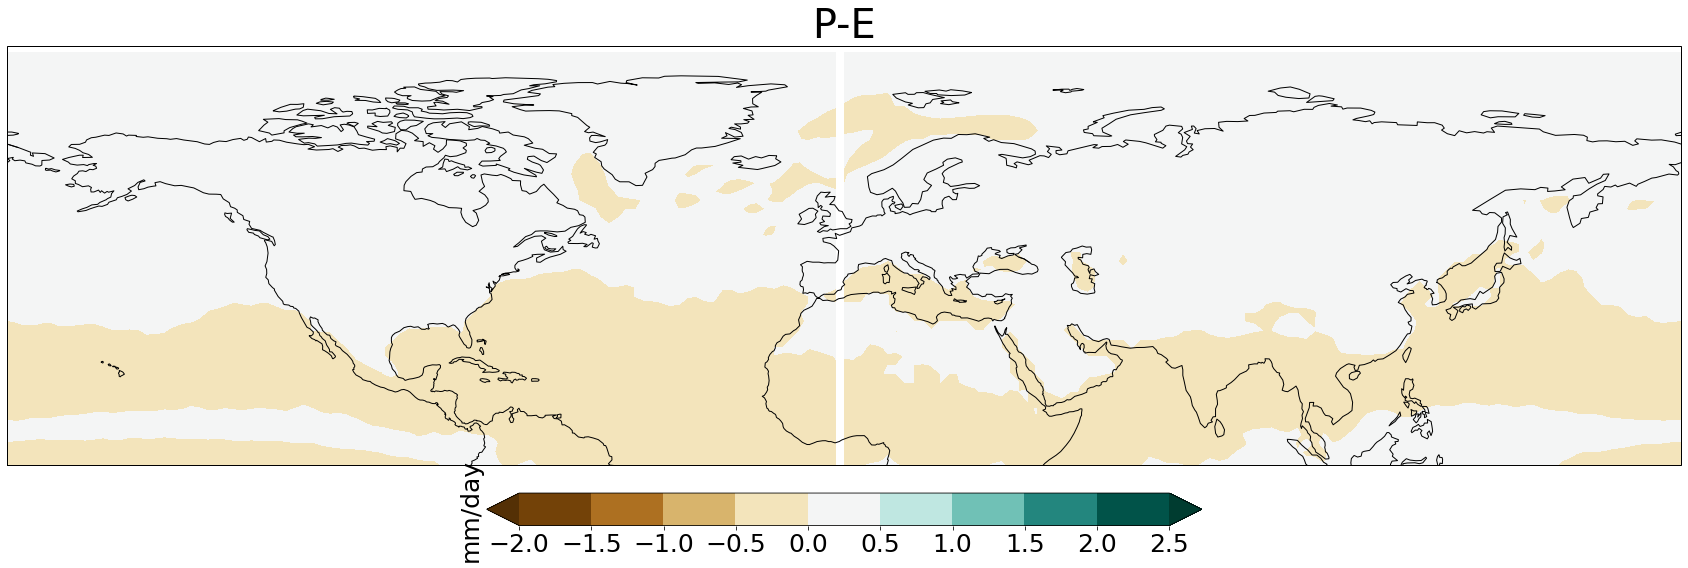

In [45]:
#plot maps
#For maps you take the ensemble mean


fig = plt.figure(1,figsize = [30,13])

#range
vc=np.arange(-2,3,.5)

# We're using cartopy and are plotting in PlateCarree projection 
# (see documentation on cartopy)
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
map=ax1.contourf(ds_ens['lon'][:], ds_ens["lat"][:], ds_ens['aprc'][0,:,:],vc, 
                 extend='both', cmap=plt.get_cmap('BrBG'))

#Title
plt.title('P-E', fontsize=40)
#If you want you can zoom in to a specific area
ax1.set_xlim([-180,180])
ax1.set_ylim([0,90])

#plotting a colorbar
cbar = plt.colorbar(map, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('mm/day', fontsize=25)

In [46]:
#To get rid of the white line in the middle --> shift white to the edges of the map
data = ds_ens['aprc']

shifted = np.zeros_like(data.data)
shifted.shape

half = 96
shifted[:,:, 0:96] = data.data[:,:, 96:]
shifted[:,:, 96:] = data.data[:, :, :96]

data.data = shifted
data.lon.data -= 180
data.lon

<xarray.DataArray 'lon' (lon: 192)>
array([-180.   , -178.125, -176.25 , -174.375, -172.5  , -170.625, -168.75 ,
       -166.875, -165.   , -163.125, -161.25 , -159.375, -157.5  , -155.625,
       -153.75 , -151.875, -150.   , -148.125, -146.25 , -144.375, -142.5  ,
       -140.625, -138.75 , -136.875, -135.   , -133.125, -131.25 , -129.375,
       -127.5  , -125.625, -123.75 , -121.875, -120.   , -118.125, -116.25 ,
       -114.375, -112.5  , -110.625, -108.75 , -106.875, -105.   , -103.125,
       -101.25 ,  -99.375,  -97.5  ,  -95.625,  -93.75 ,  -91.875,  -90.   ,
        -88.125,  -86.25 ,  -84.375,  -82.5  ,  -80.625,  -78.75 ,  -76.875,
        -75.   ,  -73.125,  -71.25 ,  -69.375,  -67.5  ,  -65.625,  -63.75 ,
        -61.875,  -60.   ,  -58.125,  -56.25 ,  -54.375,  -52.5  ,  -50.625,
        -48.75 ,  -46.875,  -45.   ,  -43.125,  -41.25 ,  -39.375,  -37.5  ,
        -35.625,  -33.75 ,  -31.875,  -30.   ,  -28.125,  -26.25 ,  -24.375,
        -22.5  ,  -20.625,  -18.75 ,  -1

Text(0, 0.5, 'mm/day')

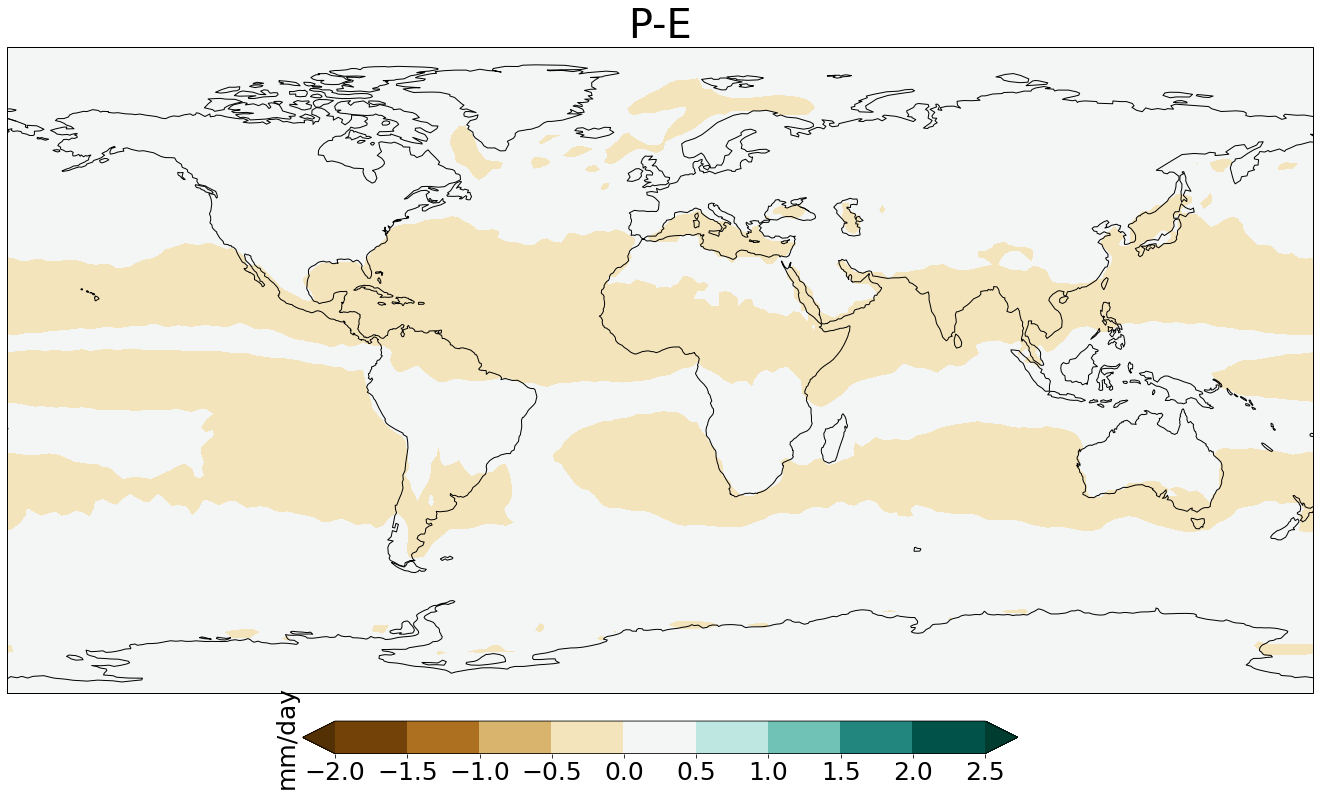

In [47]:
fig = plt.figure(1,figsize = [30,13])
vc=np.arange(-2,3,.5)

ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
map=ax1.contourf(ds_ens['lon'][:], ds_ens["lat"][:], ds_ens['aprc'][0,:,:],vc, extend='both', cmap=plt.get_cmap('BrBG'))

plt.title('P-E', fontsize=40)

cbar = plt.colorbar(map, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('mm/day', fontsize=25)

In [48]:
ds_ens_a = xr.open_dataset('Abisko-prep/ensmean_1536_1550_geopoth_seas_a.nc')


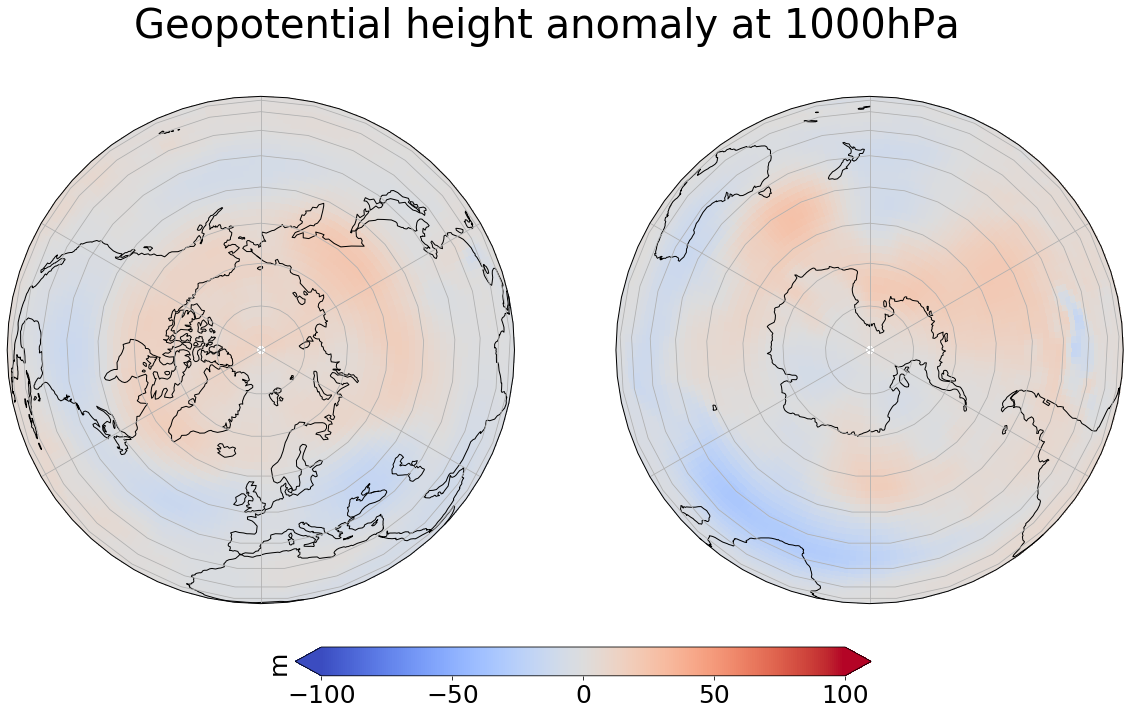

In [49]:
#Other projections are for example Orthographic projection

fig = plt.figure(figsize=[20, 10])

img = ds_ens_a['var156'][64,0,:,:]
crs = ccrs.PlateCarree()
extent = ([-180, 180, -90, -60], ccrs.PlateCarree())

# ax1 for Northern Hemisphere
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# ax2 for Southern Hemisphere
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

for ax in [ax1, ax2]:
    ax.coastlines()
    ax.gridlines()
    map = ax.imshow(img, vmin=-100, vmax=100, transform=crs, cmap=plt.get_cmap('coolwarm'))

#Titel for both plots
fig.suptitle('Geopotential height anomaly at 1000hPa', fontsize=40)

cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('m', fontsize=25)

plt.show()

In [50]:
#plot timeseries --> open climate model data ensemble runs + ensemble mean
#for a timeseries we need to have global average data --> CDO fldmean (area weighted)
ds_tas_01_a_trees_yr = xr.open_dataset('Abisko-prep/ue536a01_temp2_pre_seas_trees_fldmean_a_yrmean.nc')
ds_tas_02_a_trees_yr = xr.open_dataset('Abisko-prep/ue536a02_temp2_pre_seas_trees_fldmean_a_yrmean.nc')
ds_tas_03_a_trees_yr = xr.open_dataset('Abisko-prep/ue536a03_temp2_pre_seas_trees_fldmean_a_yrmean.nc')
ds_tas_04_a_trees_yr = xr.open_dataset('Abisko-prep/ue536a04_temp2_pre_seas_trees_fldmean_a_yrmean.nc')
ds_tas_05_a_trees_yr = xr.open_dataset('Abisko-prep/ue536a05_temp2_pre_seas_trees_fldmean_a_yrmean.nc')
ds_tas_06_a_trees_yr = xr.open_dataset('Abisko-prep/ue536a06_temp2_pre_seas_trees_fldmean_a_yrmean.nc')
ds_tas_ens_a_trees_yr = xr.open_dataset('Abisko-prep/ensmean_temp2_pre_seas_trees_fldmean_a_yrmean.nc')

In [51]:
#plot timeseries --> obs and ds in same plot
#Create time array
time_yr = time = np.arange('0526-01-31', '0552-01-28', dtype='datetime64[Y]')

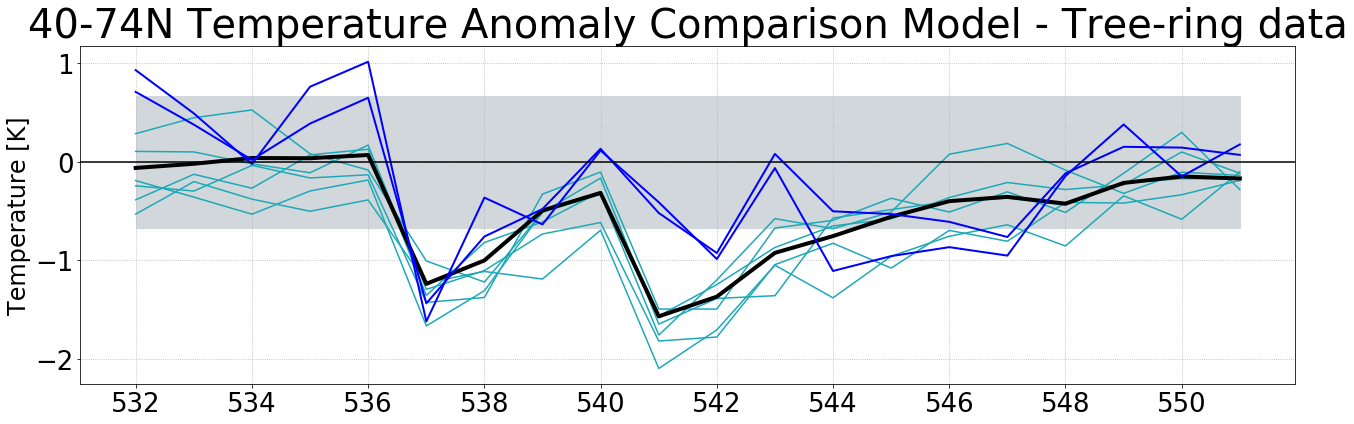

In [52]:
#plot timeseries --> obs and ds in same plot

fig = plt.figure(12, figsize= (20,6))

#Ensemble runs and ensemble mean 
plt.plot(time_yr[6:], ds_tas_01_a_trees_yr['temp2'][6:,0,0], label = 'run01', color = '#1ca9b7')
plt.plot(time_yr[6:], ds_tas_02_a_trees_yr['temp2'][6:,0,0], label = 'run02', color = '#1ca9b7')
plt.plot(time_yr[6:], ds_tas_03_a_trees_yr['temp2'][6:,0,0], label = 'run03', color = '#1ca9b7')
plt.plot(time_yr[6:], ds_tas_04_a_trees_yr['temp2'][6:,0,0], label = 'run04', color = '#1ca9b7')
plt.plot(time_yr[6:], ds_tas_05_a_trees_yr['temp2'][6:,0,0], label = 'run05', color = '#1ca9b7')
plt.plot(time_yr[6:], ds_tas_06_a_trees_yr['temp2'][6:,0,0], label = 'run06', color = '#1ca9b7')

plt.plot(time_yr[6:], ds_tas_ens_a_trees_yr['temp2'][6:,0,0], label = 'ensmean', color = 'black', linewidth = 4 )

#Observational data
#Make sure the data has the same shape and the time axis is the same. In this case we had to flip the data because it
#went back in time in the obs dataset
plt.plot(time_yr[6:], np.flip(Stoffel['NH1'][1464:1484]), label = 'NH1', color = '#0000FF', linewidth = 2)
plt.plot(time_yr[6:], np.flip(Stoffel['NH2'][1464:1484]), label = 'NH2', color = '#0000FF', linewidth = 2)

#Have a line at 0
plt.axhline(0, color='black')

#Std
plt.fill_between(time_yr[6:],-0.6723, 0.6723, color = '#d2d7db')#std control run 

#grid
plt.grid(linestyle=':')

#Titel
plt.title('40-74N Temperature Anomaly Comparison Model - Tree-ring data', fontsize=40)

#label y-axis
plt.ylabel('Temperature [K]', fontsize=24)

#size of the ticks
plt.tick_params(labelsize=26)

plt.tight_layout()

#save figure
#plt.savefig('figures/seasonal_temp_a_timeseries_trees_2sig_treeringdata.png', bbox_inches = 'tight')

plt.show()

In [53]:
ds = xr.open_dataset('Abisko-prep/Theta_OPT-0015.nc')

In [ ]:
ds_timeseries = np.mean(ds['theta'], axis=(0,1))

Text(0.5, 0.07, 'Years')

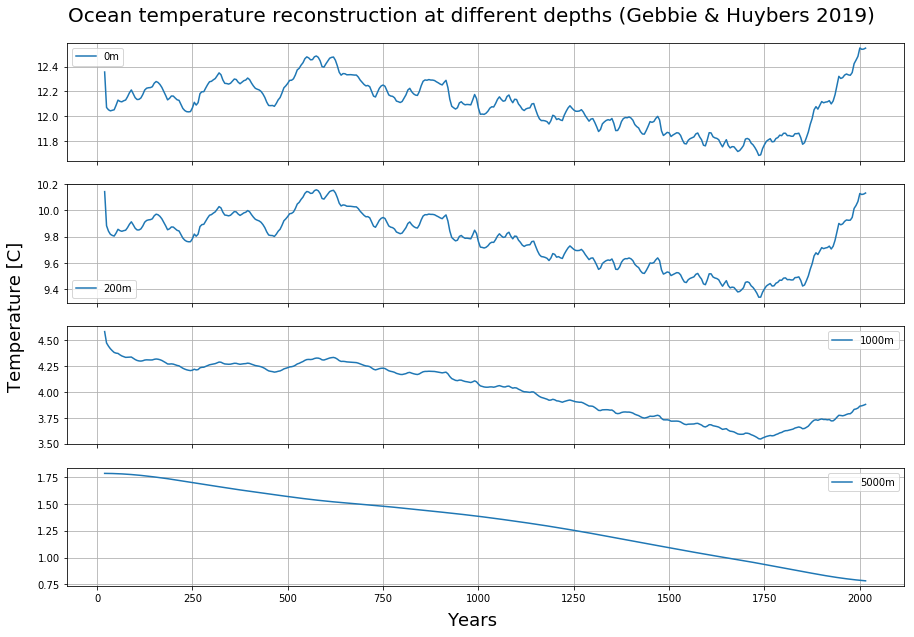

In [80]:
#Plot subplots
fig, axs = plt.subplots(4, figsize=(15,10), sharex=True)


axs[0].plot(ds['year'], ds_timeseries[0,:], label='0m')
axs[0].grid()
axs[0].legend()


axs[1].plot(ds['year'], ds_timeseries[8,:], label='200m')
axs[1].grid()
axs[1].legend()

axs[2].plot(ds['year'], ds_timeseries[17,:], label='1000m')
axs[2].grid()
axs[2].legend()

axs[3].plot(ds['year'], ds_timeseries[-2,:], label='5000m')
axs[3].grid()
axs[3].legend()

fig.suptitle('Ocean temperature reconstruction at different depths (Gebbie & Huybers 2019)',x=0.5, y=0.93, ha='center', 
             va='top', fontsize=20)
fig.text(0.07, 0.5, 'Temperature [C]', va='center', rotation='vertical', fontsize=18)
fig.text(0.5, 0.07, 'Years', ha='center', fontsize=18)